In [61]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure
import pylab as plt
import blimpy
from blimpy import Waterfall
from blimpy import calcload
import os
import glob
import numpy as np
import time
from scipy.stats import norm, kurtosis, kurtosistest
import scipy
import numpy.ma as ma
import seaborn as sns

In [15]:
file_path = '/lustre/aoc/students/jsofair/playing-with-cosmic-data/filterbank/'
file_list = glob.glob(os.path.join(file_path,'*.fil'))

ml_list = []
for i, file in enumerate(file_list):
    ml = blimpy.calcload.calc_max_load(os.path.join(file))
    ml_list.append(ml)
    print(f'{ml} -- {file[65:]}')

11.0 -- band_test_AC_CO-beam0001.fil
9.0 -- Band_Test_BD_C512-beam0001.fil
9.0 -- band_test_AC_C512-beam0001.fil
11.0 -- Band_Test_BD_C0-beam0001.fil
7.0 -- band_test_GPU3_BD_C32-beam0001.fil
11.0 -- band_test_AC_C32-beam0001.fil
4.0 -- band_test_AC_C544-beam0001.fil


In [16]:
t0 = time.time()


# for i in range(0, len(file_list)):
#     exec(f'water{i} = Waterfall(os.path.normpath(file_list[{i}]), max_load = ml_list[{i}])')
#     exec(f'water_list.append(water{i})')
    
    
water0 = Waterfall(os.path.normpath(file_list[0]), max_load = ml_list[0])
water1 = Waterfall(os.path.normpath(file_list[1]), max_load = ml_list[1])
water2 = Waterfall(os.path.normpath(file_list[2]), max_load = ml_list[2])
water3 = Waterfall(os.path.normpath(file_list[3]), max_load = ml_list[3])
water4 = Waterfall(os.path.normpath(file_list[4]), max_load = ml_list[4])
water5 = Waterfall(os.path.normpath(file_list[5]), max_load = ml_list[5])
water6 = Waterfall(os.path.normpath(file_list[6]), max_load = ml_list[6])

water_list = [water0, water1, water2, water3, water4, water5, water6]
# print(water_list)

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 120.1690444946289


In [4]:
for i in water_list:
    print(len(i.get_freqs()))

4194304
4194304
4194304
4194304
4194304
4194304
4194304


In [5]:
water0.info()


--- File Info ---
      machine_id :                                0
    telescope_id :                               -1
         src_raj :                 4:09:22.00873993
         src_dej :                12:17:39.84749624
        az_start :            6.92893078665377e-310
        za_start :             4.6846816423532e-310
       data_type :                                1
            fch1 :           1996.4999961853027 MHz
            foff :           -7.62939453125e-06 MHz
          nchans :                          4194304
          nbeams :                                2
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2023-05-10T21:56:53.857
    tstart (MJD) :                60074.91451223567
           tsamp :                         0.131072
            nifs :                                1
     barycentric :                                1
   pulsarcentric :                           

In [7]:
# Code modified from blimpy GitHub (plotting > plot_kurtosis.py)
# As n_divs increases, the time to complete this section decreases (tested from n_divs = 2 to n_divs = 10).
# It seems that 15 is a bit much to handle, and the TTC increases when n_divs = 15.

t0 = time.time()
wf0 = water0
n_divs = 10
all_sig_kurts = []
all_sig_freqs = []
pltdata = []

wf_n = np.array_split(wf.get_freqs(), n_divs) # Split wf into (n_divs) divisions
for division in wf_n:
    f_start = np.amin(division)
    f_stop = np.amax(division)
    
    plot_f, plot_data = wf.grab_data(f_start, f_stop, if_id=0)
    
    # Using accending frequency for all plots.
    if wf.header['foff'] < 0:
            plot_data = plot_data[..., ::-1]  # Reverse data
            plot_f = plot_f[::-1]
            
    print(type(plot_data))
    print(np.shape(plot_data))
    
    pltdata.append(kurtosis(plot_data, axis=0, nan_policy='omit'))
    try:
        print(np.shape(pltdata))
    except:
#         print(np.shape(pltdata))
        print("The shape of pltdata is now inhomogeneous")
    
    # Add kurtoses with Pearson kurt() > 0 to an array
#     all_sig_kurts.append(pltdata[np.where(pltdata[0] > 0)])
    
    # Make sure you use plot_f and NOT wf.get_freqs() because the order of wf.get_freqs() is decreasing,
    # but we want it to be increasing!
    
    # Add frequencies with Pearson kurt() > 0 to an array
#     all_sig_freqs.append(plot_f[np.where(pltdata[0] > 0)])
    
t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

<class 'numpy.ndarray'>
(640, 419431)
(1, 419431)
<class 'numpy.ndarray'>
(640, 419431)
(2, 419431)
<class 'numpy.ndarray'>
(640, 419431)
(3, 419431)
<class 'numpy.ndarray'>
(640, 419431)
(4, 419431)
<class 'numpy.ndarray'>
(640, 419430)
The shape of pltdata is now inhomogeneous
<class 'numpy.ndarray'>
(640, 419430)
The shape of pltdata is now inhomogeneous
<class 'numpy.ndarray'>
(640, 419430)
The shape of pltdata is now inhomogeneous
<class 'numpy.ndarray'>
(640, 419430)
The shape of pltdata is now inhomogeneous
<class 'numpy.ndarray'>
(640, 419430)
The shape of pltdata is now inhomogeneous
<class 'numpy.ndarray'>
(640, 419430)
The shape of pltdata is now inhomogeneous
Elapsed time: 84.11658668518066


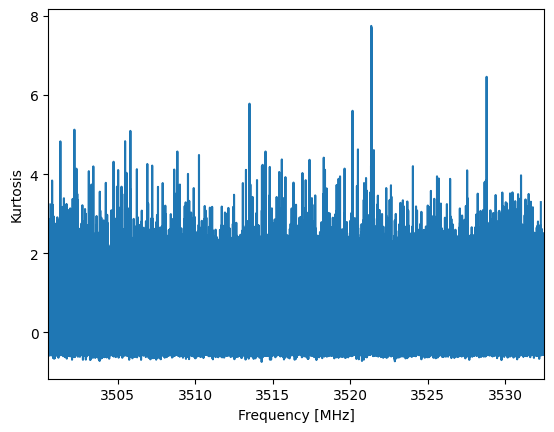

In [58]:
water1.plot_kurtosis()

In [ ]:
fig, ax = plt.subplots()

ax.plot(wf.get_freqs(), wf.data[0][0])
ax.plot(wf.get_freqs(), wf.data[1][0])

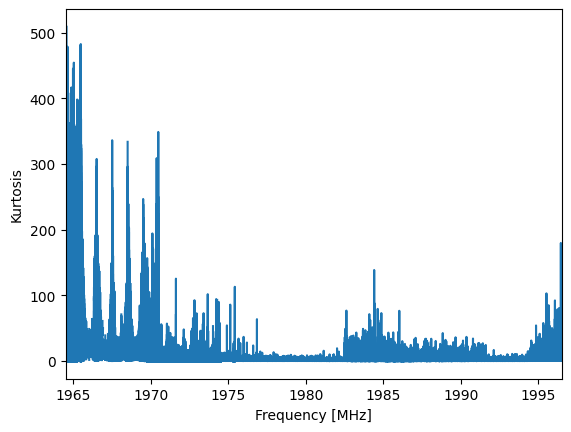

In [68]:
# wf.plot_spectrum(f_start = 1990, f_stop = 1995, c='r')
water0.plot_kurtosis()

extracting integration 0...


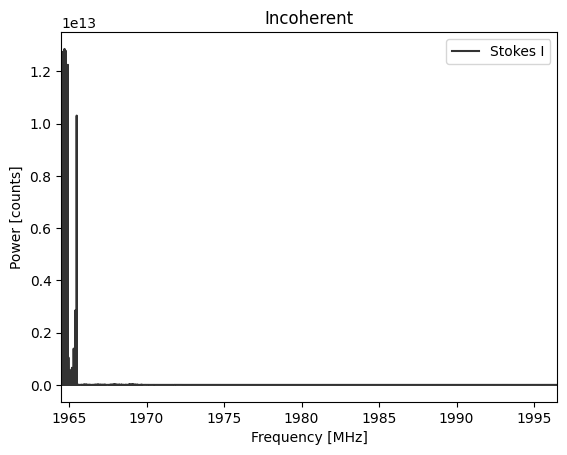

In [96]:
water0.plot_spectrum()

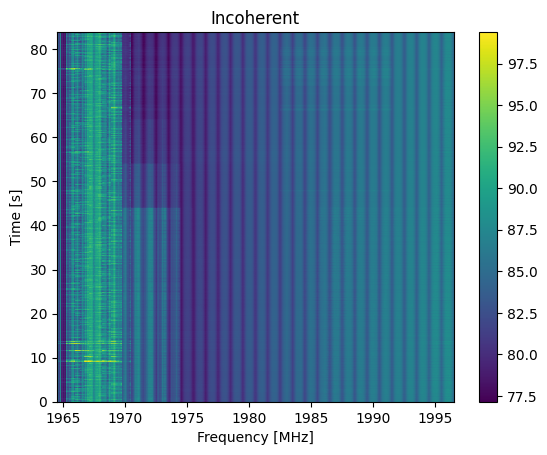

In [66]:
water0.plot_waterfall()

In [81]:
def plot_tavg_power(wf_in, t=0,
                    f_start=0, f_stop=6000,
                    p_start=0, p_stop=5*10**10):
# def plot_tavg_power(wf_in, t=0,
#                     f_start=np.amin(wf_in.get_freqs()), f_stop=np.amax(wf_in.get_freqs()),
#                     p_start=0, p_stop=np.amax(wf_in.data)):
    # Plot the time-averaged power spectrum for a given blimpy waterfall object
    # wf: The desired input waterfall object
    # t: The integration number
    # f_start: Lower bound for frequency (horizontal) axis
    # f_stop: Upper bound for frequency (horizontal) axis
    # p_start: Lower bound for time-averaged power (veritcal) axis
    # p_start: Lower bound for time-averaged power (veritcal) axis

    wf_pwr_mean = np.mean(wf_in.data, axis=0)
    wf_pwr_mean_integration = wf_pwr_mean[t]
    
    print(f'Extracting integration {t}...')
    
    fig, ax = plt.subplots()
    ax.set_xlim(f_start, f_stop)
    ax.set_ylim(p_start, p_stop)
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel('Time-Averaged Power (???)')

    ax.plot(wf_in.get_freqs(), wf_pwr_mean_integration)
    plt.show()
    plt.close()


    

    # Based off of this code:
    # wf0_pwr = water0.data
    # print(wf0_pwr.shape)

    # wf0_pwr_mean = np.mean(data_test, axis=0)
    # print(wf0_pwr_mean, len(wf0_pwr_mean[0]))

    # wf0_pwr_mean0 = test_mean[0]
    # print(test_mean0.shape)
    # print(test_mean0)
    
    
    

Extracting integration 0...


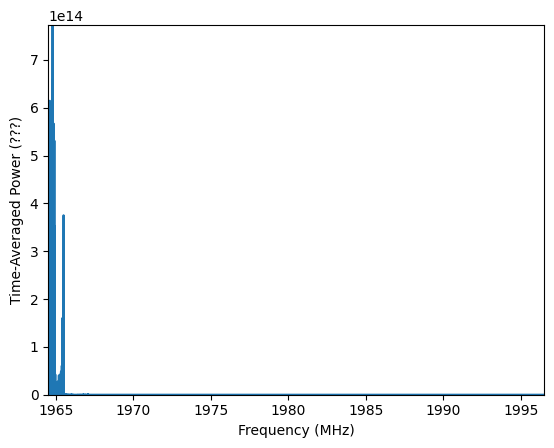

In [82]:
plot_tavg_power(wf_in=water0, t=0, 
                f_start=np.amin(water0.get_freqs()), f_stop=np.amax(water0.get_freqs()),
                p_start=0, p_stop=np.amax(water0.data))
# plt.autoscale(axis='y')

extracting integration 0...
[640. 480.]


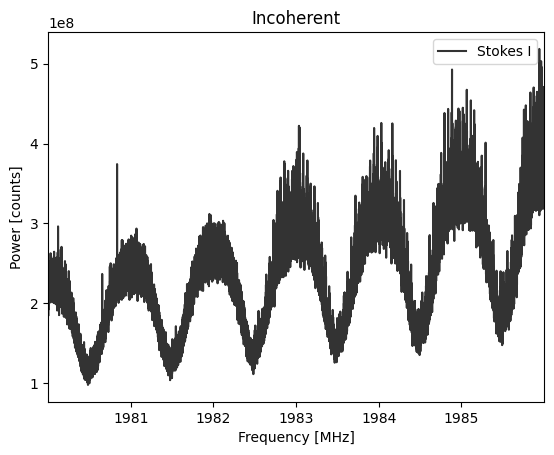

In [78]:
water0.plot_spectrum(f_start = 1980, f_stop = 1986)
fig1 = plt.gcf()
fig_size = fig1.get_size_inches()*fig1.dpi # size in pixels#
print(fig_size)

# fig1.set_size_inches(10,10)
# figure(figsize=(10,10))

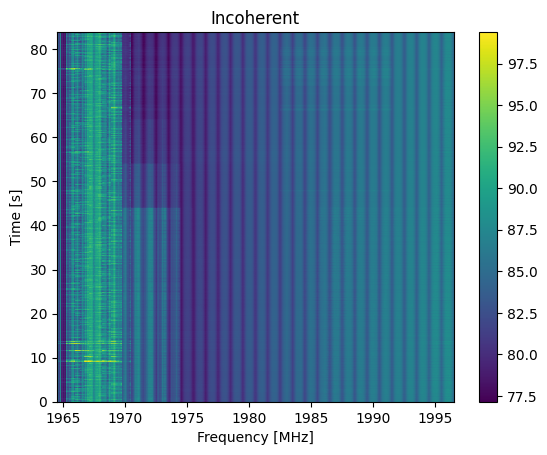

In [17]:
wf.plot_waterfall()

In [ ]:
# Ideally, I would like to see if plot_data and wf.data are the same to see if we're taking the kurtosis of power,
# but sorting these giant arrays takes a while :)
# np.shape(plot_data)
# print(f"plot_data: {plot_data.sort(axis=0)},\n\n\n\n wf data: {wf.data.sort(axis=0)}")

In [108]:
# np.shape(plot_data)
# print(f"plot_data: {plot_data},\n\n\n\n wf data: {wf.data} \n\n\n\n wf shape: {np.shape(wf)}")
# wf.data.shape
wf_abr = wf.data[0][0][0:419430]

print(np.shape(plot_data), np.shape(wf_abr))
# print(plot_data)
# np.shape(wf_abr)


(512, 419430) (419430,)


In [109]:
plot_data

array([[6.04516864e+08, 6.64575872e+08, 6.78009088e+08, ...,
        1.00410270e+14, 4.01153402e+14, 4.45173964e+14],
       [7.93711104e+08, 8.54445568e+08, 8.71725184e+08, ...,
        1.00410614e+14, 4.01156757e+14, 4.45179803e+14],
       [9.14506880e+08, 9.36332352e+08, 9.40796800e+08, ...,
        1.00411629e+14, 4.01166454e+14, 4.45181782e+14],
       ...,
       [2.28274227e+09, 2.28423168e+09, 2.29642701e+09, ...,
        3.28748709e+14, 5.50151991e+14, 7.15033135e+14],
       [2.30921882e+09, 2.31752806e+09, 2.31869158e+09, ...,
        3.28748910e+14, 5.50152260e+14, 7.15035148e+14],
       [2.33049805e+09, 2.35997363e+09, 2.36946406e+09, ...,
        3.28749917e+14, 5.50154105e+14, 7.15038772e+14]], dtype=float32)

In [110]:
sorted_plot_data = np.sort(plot_data, axis=0)

In [111]:
sorted_wf = np.sort(wf_abr, axis=0)

In [112]:
print(sorted_wf)

[6.2438099e+08 6.8921536e+08 6.9103616e+08 ... 2.8287780e+09 2.9661235e+09
 5.0683904e+09]


In [83]:
wf.info()


--- File Info ---
      machine_id :                                0
    telescope_id :                               -1
         src_raj :                 4:09:22.00873993
         src_dej :                12:17:39.84749624
        az_start :             6.9287069824102e-310
        za_start :             4.6633787335631e-310
       data_type :                                1
            fch1 :           3532.4999961853027 MHz
            foff :           -7.62939453125e-06 MHz
          nchans :                          4194304
          nbeams :                                2
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2023-05-10T22:08:42.502
    tstart (MJD) :               60074.922714145854
           tsamp :                         0.131072
            nifs :                                1
     barycentric :                                1
   pulsarcentric :                           

In [ ]:
len(sorted_plot_data.flatten())

In [107]:
len(pltdata[0])

419431

In [101]:
np.shape(sorted_plot_data)

(512, 419430)

In [102]:
wf.get_freqs()[0]-wf.get_freqs()[4]

3.0517578125e-05

In [ ]:
wf.data[0:419430]

In [ ]:
water0.plot_kurtosis()

In [ ]:
fig, ax = plt.subplots()

ax.plot(wf.get_freqs()[0:len(pltdata[0])], pltdata[0], label='bin 0')
ax.plot(wf.get_freqs()[len(pltdata[0]):len(pltdata[0]) + len(pltdata[1])], pltdata[1], label='bin 1')

# ax.plot(inf_freqs, np.full(6, fill_value= 3), '.', label='infinite')
ax.legend()

In [ ]:
fig, ax = plt.subplots()

for i in range(0,3):
#     if i-1 < 0:
    ax.plot(
        wf_n.get_freqs[range(int(np.rint(np.nextafter(np.amin(wf_n[0]), np.amin(wf_n[0])+1))),
                  int(np.rint(np.nextafter(np.amax(wf_n[0]), np.amax(wf_n[0])+1))))],
    
        pltdata[i])     
    ax.legend()

        #     else:
#         exec('ax.plot(wf.get_freqs()[len(pltdata[i-1]) : len(pltdata[i-1]) + len(pltdata[i])], pltdata[i], label="bin {i}")')
#     if i <= (len(wf.get_freqs()) % n_divs):

In [115]:
# bounds = range(int(np.rint(np.nextafter(np.amin(wf_n[0]), np.amin(wf_n[0])+1))),
#                   int(np.rint(np.nextafter(np.amax(wf_n[0]), np.amax(wf_n[0])+1))))
print(np.where(np.rint(wf_n[1]) == bounds[1]))
# print(wf_n)
# # wf_n[bounds[0]]
    
print(wf_n[1])

(array([], dtype=int64),)
[3529.29999161 3529.29998398 3529.29997635 ... 3526.10000992 3526.10000229
 3526.09999466]


In [ ]:
for i in range(0,n_divs):
    if i-1 < 0:
        freq_range = wf.get_freqs()[0:len(pltdata[0])]
        print(len(freq_range))
        print(np.amin(freq_range), np.amax(freq_range), "\n")
    else:
        freq_range = wf.get_freqs()[len(pltdata[i-1]) : len(pltdata[i-1]) + len(pltdata[i])]
        print(len(freq_range))
        print(np.amin(freq_range), np.amax(freq_range), "\n")

        

In [ ]:
np.rint(np.amax(wf_n[i]))

# a = 5.6
np.rint(np.nextafter(np.amax(wf_n[0]), np.amax(wf_n[0])+1))

In [ ]:
range(np.rint(np.nextafter(np.amin(wf_n[0]), np.amin(wf_n[0])+1)),
                  np.rint(np.nextafter(np.amax(wf_n[0]), np.amax(wf_n[0])+1)))

In [89]:
type(int(np.rint(np.nextafter(np.amin(wf_n[0]), np.amin(wf_n[0])+1))))


int

In [74]:
for i in range(0,n_divs):
    print(np.amax(wf_n[i]))
    print(np.amin(wf_n[i]), "\n")

type(np.amax(wf_n[i]))
#     print(np.amax(wf_n[i]), np.amin(wf_n)[i], "\n")

3532.4999961853027
3529.2999992370605 

3529.299991607666
3526.099994659424 

3526.0999870300293
3522.899990081787 

3522.8999824523926
3519.6999855041504 

3519.699977874756
3516.499988555908 

3516.4999809265137
3513.299991607666 

3513.2999839782715
3510.099994659424 

3510.0999870300293
3506.8999977111816 

3506.899990081787
3503.7000007629395 

3503.699993133545
3500.5000038146973 



numpy.float64

In [19]:
# print((all_sig_freqs[0]))
# print(all_sig_kurts[0])
# print(pltdata)


# Grab index of infinities:
# np.where(np.isinf(all_sig_kurts[0]))

inf_freqs = all_sig_freqs[0][np.where(np.isinf(all_sig_kurts[0]))]
inf_kurts = all_sig_kurts[0][np.where(np.isinf(all_sig_kurts[0]))]

print(inf_freqs, inf_kurts)

# print(all_sig_kurts[0][np.where[all_sig_kurts ]])

[3532.20746231 3532.20746994 3532.21170425 3532.28691483 3532.28692245
 3532.41310501] [inf inf inf inf inf inf]


In [132]:
# Code modified from blimpy GitHub (plotting > plot_kurtosis.py)
t0 = time.time()
wf = water0_abr
f_start = np.amin(wf.get_freqs())
f_stop = np.amax(wf.get_freqs())


plot_f, plot_data = wf.grab_data(f_start, f_stop, if_id=0)

# Using accending frequency for all plots.
if wf.header['foff'] < 0:
        plot_data = plot_data[..., ::-1]  # Reverse data
        plot_f = plot_f[::-1]

# try:
pltdata = kurtosis(plot_data, axis=0, nan_policy='omit')
# except:
#     pltdata = plot_data * 0.0
    

# print(plot_f[0], plot_f[-1])
print(pltdata)

# print(len(plot_data))

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

[ 0.47625828 -0.13222933  0.6003506  ...  0.04624271 -0.2579801
  0.32947755]
Elapsed time: 13.880631923675537


In [116]:
sig_list = pltdata[np.where(pltdata > 3)]
print(sig_list)


# Make sure you use plot_f and NOT wf.get_freqs() because the order of wf.get_freqs() is decreasing,
# but we want it to be increasing!
sig_freqs = plot_f[np.where(pltdata > 3)]

[3.2434425 3.8816586 3.1341295 3.19694   4.0967464 3.4022956 3.0526323
 3.164588  3.166801        inf 3.5075154 3.0723891 3.0956354 3.7970862
 3.834484  6.4621    3.0864758 3.019012  3.4733815 3.0502224 3.0730796
 3.0256214 3.0479145 3.5359287 3.1873703 3.2907758 3.0481367 3.2624302
 3.103744  3.5138254 3.2085538 3.5398455 3.1312375 3.3175197 3.113266
 3.4951544 3.3857303 3.9709535 3.3616714 3.1952715 3.499682  3.3039317
 3.1638112       inf       inf       inf 3.2933726       inf       inf
       inf]


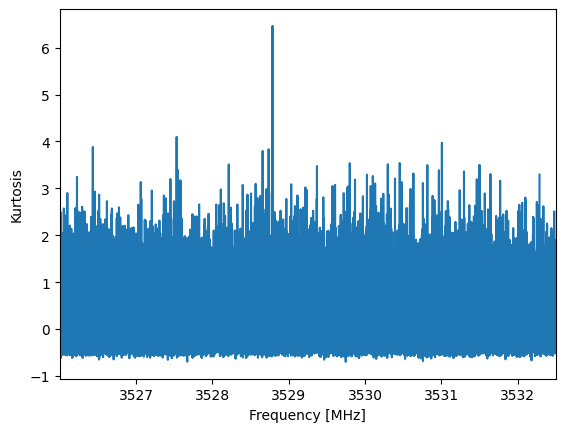

In [72]:
plt.plot(plot_f, pltdata)
plt.xlim(plot_f[0], plot_f[-1])
plt.ylabel("Kurtosis")
plt.xlabel("Frequency [MHz]")
plt.show()